In [0]:
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
corpus = ['king is a happy man', 
          'queen is a funny woman',
          'queen is an old woman',
          'king is an old man', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is happy',
          'woman is funny',
          'prince is a boy will be king',
          'princess is a girl will be queen']


In [4]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
def corpus_tokenizer(corpus):
    sentences = []
    for c in corpus:
        doc = nlp(c)
        tokens = []
        for t in doc:
            if t.is_stop == False:
                tokens.append(t.text)
        sentences.append(tokens)
    return sentences

sentences = corpus_tokenizer(corpus)
sentences

[['king', 'happy', 'man'],
 ['queen', 'funny', 'woman'],
 ['queen', 'old', 'woman'],
 ['king', 'old', 'man'],
 ['boy', 'young', 'man'],
 ['girl', 'young', 'woman'],
 ['prince', 'young', 'king'],
 ['princess', 'young', 'queen'],
 ['man', 'happy'],
 ['woman', 'funny'],
 ['prince', 'boy', 'king'],
 ['princess', 'girl', 'queen']]

In [0]:
num_features=2
window_size=1
workers=1
min_word_count=1

In [0]:
model = w2v.Word2Vec(size=num_features, window=window_size,workers=workers,min_count=min_word_count,seed=0)

In [0]:
model.build_vocab(sentences)

In [8]:
model.train(sentences,total_words=model.corpus_count,epochs=1)

(3, 34)

In [9]:
model.wv['king']
model.wv.similarity('boy', 'prince')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


-0.420175

In [0]:
vocab = list(model.wv.vocab)
X = model.wv[vocab]

In [11]:
df = pd.DataFrame(X, index=vocab, columns=['x', 'y'])
df

,x,y
king,-0.018153,0.088775
happy,-0.031544,0.005176
man,-0.169953,-0.057880
queen,-0.124666,-0.007896
funny,0.205370,0.171038
woman,-0.060826,0.247152
old,-0.108591,-0.133563
boy,0.081690,0.067949
young,0.091712,0.133538
girl,0.050258,-0.104943


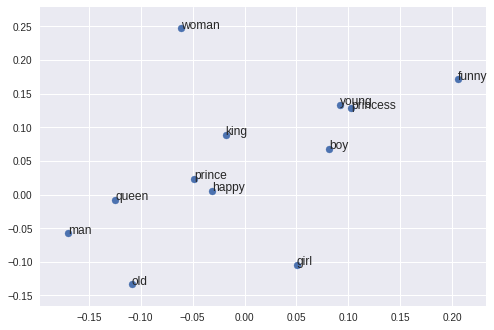

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for word, pos in df.iterrows():
    ax.annotate(word, pos)

ax.scatter(df['x'], df['y'])
plt.show()